In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('Data/digit_recognizer/train.csv')
print(train.shape)
train.sample()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26246,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'label: 8')

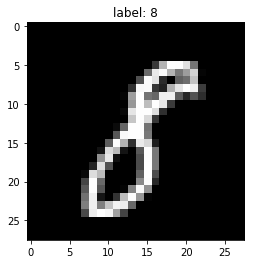

In [4]:
index = 5000

# .reshape(28, 28) : 28 x 28 로 끊어서 모양을 다시 잡아준다
plt.imshow(train.iloc[index, 1:].values.reshape(28, 28), cmap='gray')
plt.title('label: {}'.format(train.iloc[index, 0]))

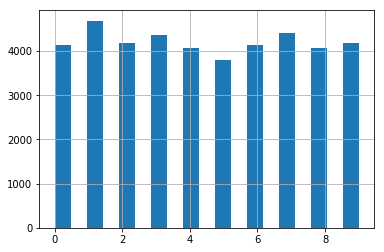

In [5]:
train['label'].hist(bins=19)

0 부터 9 까지 고르게 분포해있다

# 변수 설정

In [6]:
# 8 인지 아닌지만 확인하기
X = train.drop('label', axis=1)
y = train['label'] == 8

# Hold-out Validation
train - validation 셋으로 데이터를 한 번 나누면 끝

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# train 데이터를 train 과 validation set 으로 나눠준다
# 분할 비율 정해주지 않으면 0.25 가 Default
# 데이터 사이즈가 충분히 크면 validation set 크기를 줄인다, 학습을 더 잘하기 위해
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.05)

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
randomforest = RandomForestClassifier()

In [11]:
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# randomforest.feature_importances_
prediction = randomforest.predict(X_validation)

evaluation = pd.DataFrame(y_validation)
evaluation['prediction'] = prediction
evaluation

,label,prediction
34609,False,False
887,True,True
27107,False,False
27142,False,False
14907,False,False
8255,False,False
15135,True,True
26541,True,False
21491,False,False
36589,False,False


# Confusion Matrix

In [13]:
# groupby 로 confusion matrix 그리기
evaluation.groupby(['label', 'prediction']).size()

label  prediction
False  False         1877
       True             3
True   False           56
       True           164
dtype: int64

In [14]:
# 라이브러리를 이용해 confusion matrix 그리기
from sklearn.metrics import confusion_matrix

In [15]:
tn, fp, fn, tp = confusion_matrix(y_validation, prediction).ravel()
print(tn, fp, fn, tp)
confusion_matrix(y_validation, prediction)

1877 3 56 164


array([[1877,    3],
       [  56,  164]], dtype=int64)

In [16]:
accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = (tp) / (fp + tp)
recall = (tp) / (tn + tp)
specificity = tn / (tn + fp)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('specificity', specificity)
print('f1-score', precision * recall * 2 / (precision + recall))

accuracy 0.9719047619047619
precision 0.9820359281437125
recall 0.08035276825085742
specificity 0.9984042553191489
f1-score 0.14855072463768118


## Classfication Report 읽기
Confusion Matrix 와 지표 한번에 보여준다

In [17]:
from sklearn.metrics import classification_report

In [18]:
# macro avg : 단순 평균
# weighted avg : label 갯수를 반영한 가중평균
print(classification_report(evaluation['label'], evaluation['prediction']))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1880
        True       0.98      0.75      0.85       220

    accuracy                           0.97      2100
   macro avg       0.98      0.87      0.92      2100
weighted avg       0.97      0.97      0.97      2100



# Cross-Validation
Hold-out validation 의 경우 validation 셋에 중요한 피쳐가 모두 들어간 경우 학습능력이 떨어진다

보완하기 위해서 Cross-Validation 을 한다

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# 5 번의 Cross-Validation 진행한 결과 accuracy 를 각각 출력
print(cross_val_score(randomforest, X, y, cv=5, scoring='accuracy'))
print(cross_val_score(randomforest, X, y, cv=5, scoring='precision'))
print(cross_val_score(randomforest, X, y, cv=5, scoring='recall'))

[0.97405071 0.97607428 0.97464286 0.9732111  0.97678295]
[0.9845679  0.98392283 0.97196262 0.98333333 0.97557003]
[0.7404674  0.75768758 0.74907749 0.73275862 0.75      ]


## 모델을 직접 만들어 cross-validation 에 적용해보기

In [21]:
from sklearn.base import BaseEstimator

In [22]:
# 들어오는 input 이 무엇이든 8 이 아니라고 판단하는 모델

class Never8(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
# 만든 모델에 학습시키고 예측
model = Never8()
model.fit(X_train, y_train)
model.predict(X_validation)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
cross_val_score(model, X, y, cv=5, scoring='accuracy')

array([0.90535714, 0.9025    , 0.9047619 , 0.89916667, 0.90452381])

In [25]:
cross_val_score(model, X, y, cv=5, scoring='precision')

array([0., 0., 0., 0., 0.])

In [26]:
cross_val_score(model, X, y, cv=5, scoring='recall')

array([0., 0., 0., 0., 0.])

True Positive 가 0 이기 때문에, Precision 과 Recall 모두 0

# ROC Curve
with Hold-out Validation

ROC Curve 를 그리려면 Prediction Probability 가 필요하다

- Prediction 은 label 0, label 1 중에 결정해서 값 하나만 출력
- Prediction Probability 은 label 0, label 1 이 될 확률을 각각 출력

    → multi-class classifier 라면 확률을 class 갯수만큼 출력

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [28]:
# label 0 , label 1 에 대한 Probability 가 각각 따로 나온다
randomforest.predict_proba(X_validation)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
y_probability = randomforest.predict_proba(X_validation)[:, 1]
y_probability

array([0., 1., 0., ..., 0., 0., 0.])

In [30]:
# fpr False Positive Rate: fell-out
# tpr True Positive Rate: recall
fpr, tpr, threshold = roc_curve(y_validation, y_probability)

# auc: Area Under Curve
auc_score = roc_auc_score(y_validation, y_probability)

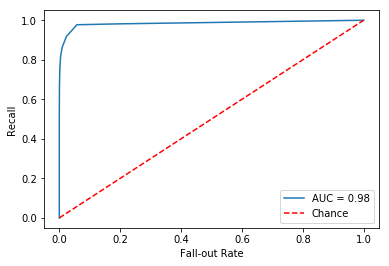

In [31]:
# x 축을 fpr, y 축을 tpr 로 하는 그래프 그리기
plt.plot(fpr, tpr
         , label='AUC = %0.2f' % (auc_score)
        )

# 45 도 각도 점선 그리기
plt.plot([0, 1], [0, 1], 'r--', label='Chance')

# x 라벨과 y 라벨 이름 붙여주기
plt.xlabel('Fall-out Rate')
plt.ylabel('Recall')

# 각 그래프의 legend 출력하기, 위치 정해주기
plt.legend(loc='best')
plt.show()

# ROC Curve 직접 그리기
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [81]:
print(sorted(np.unique(y_probability)))
sorted(threshold)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]